<a href="https://colab.research.google.com/github/TAkkerboom/DL2_socratic_models_team_2/blob/main/demos/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Socratic Models

The first step is to clone our github repository

In [ ]:
# Pull the git repository
!git clone 'https://github.com/TAkkerboom/DL2_socratic_models_team_2.git'

fatal: destination path 'DL2_socratic_models_team_2' already exists and is not an empty directory.


In [ ]:
! nvidia-smi

Thu May 25 17:18:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       806Mi       2.9Gi       2.0Mi       9.0Gi        11Gi
Swap:            0B          0B          0B


In [ ]:
! lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           85
Model name:                      Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:                        3
CPU MHz:                         2000.170
BogoMIPS:                        4000.34
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        1 MiB
L3 cache:                        38.5 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
# Install dependencies
!pip install -q transformers accelerate sentencepiece gradio

In [ ]:
%cd DL2_socratic_models_team_2/
!pwd

/content/DL2_socratic_models_team_2
/content/DL2_socratic_models_team_2


## Load Raven Progressive Matrices

With this notebook, the Raven Progressive Matrices (RPM) are solved. These matrices consist of 8 figures in different angles, in which the 9th is unknown. First we load a subset of this dataset.

The subset of the Raven Progressive Matrices (RPM) are loaded

In [ ]:
from src.dataset import Raven

# load the Raven Progressive matrices 
test_set = Raven('./center_single_subset', 'test', '')
test_set.load_data()

Loading item: 0
Loading item: 1
Loading item: 2
Loading item: 3
Loading item: 4
Loading item: 5
Loading item: 6
Loading item: 7


### Plot Puzzle

Then we choose one of the puzzles to solve with this notebook. You can choose any number.

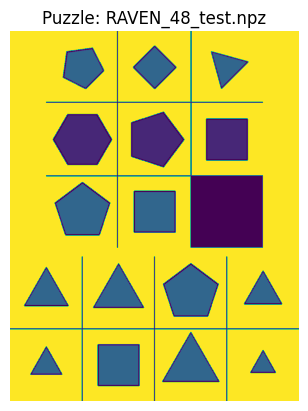

In [ ]:
# change the variable PUZZLE_NUMBER to see different puzzles
PUZZLE_NUMBER = 4
test_set.plot_puzzle(PUZZLE_NUMBER)

#Socratic Model Experiment 1 and 2

With these experiments we test the Socratic Models in different parts. First we prompt only the Language Model(*Experiment 1*). Then we chain the Visual Language Model to the Language Model, as can be seen in Figure below. The Visual Language Models (CLIP and BLIP) obtain the shape, angles and color of the different figures. With this information, a prompt is generated for the Large Language Model(Flan5 in different sizes). 

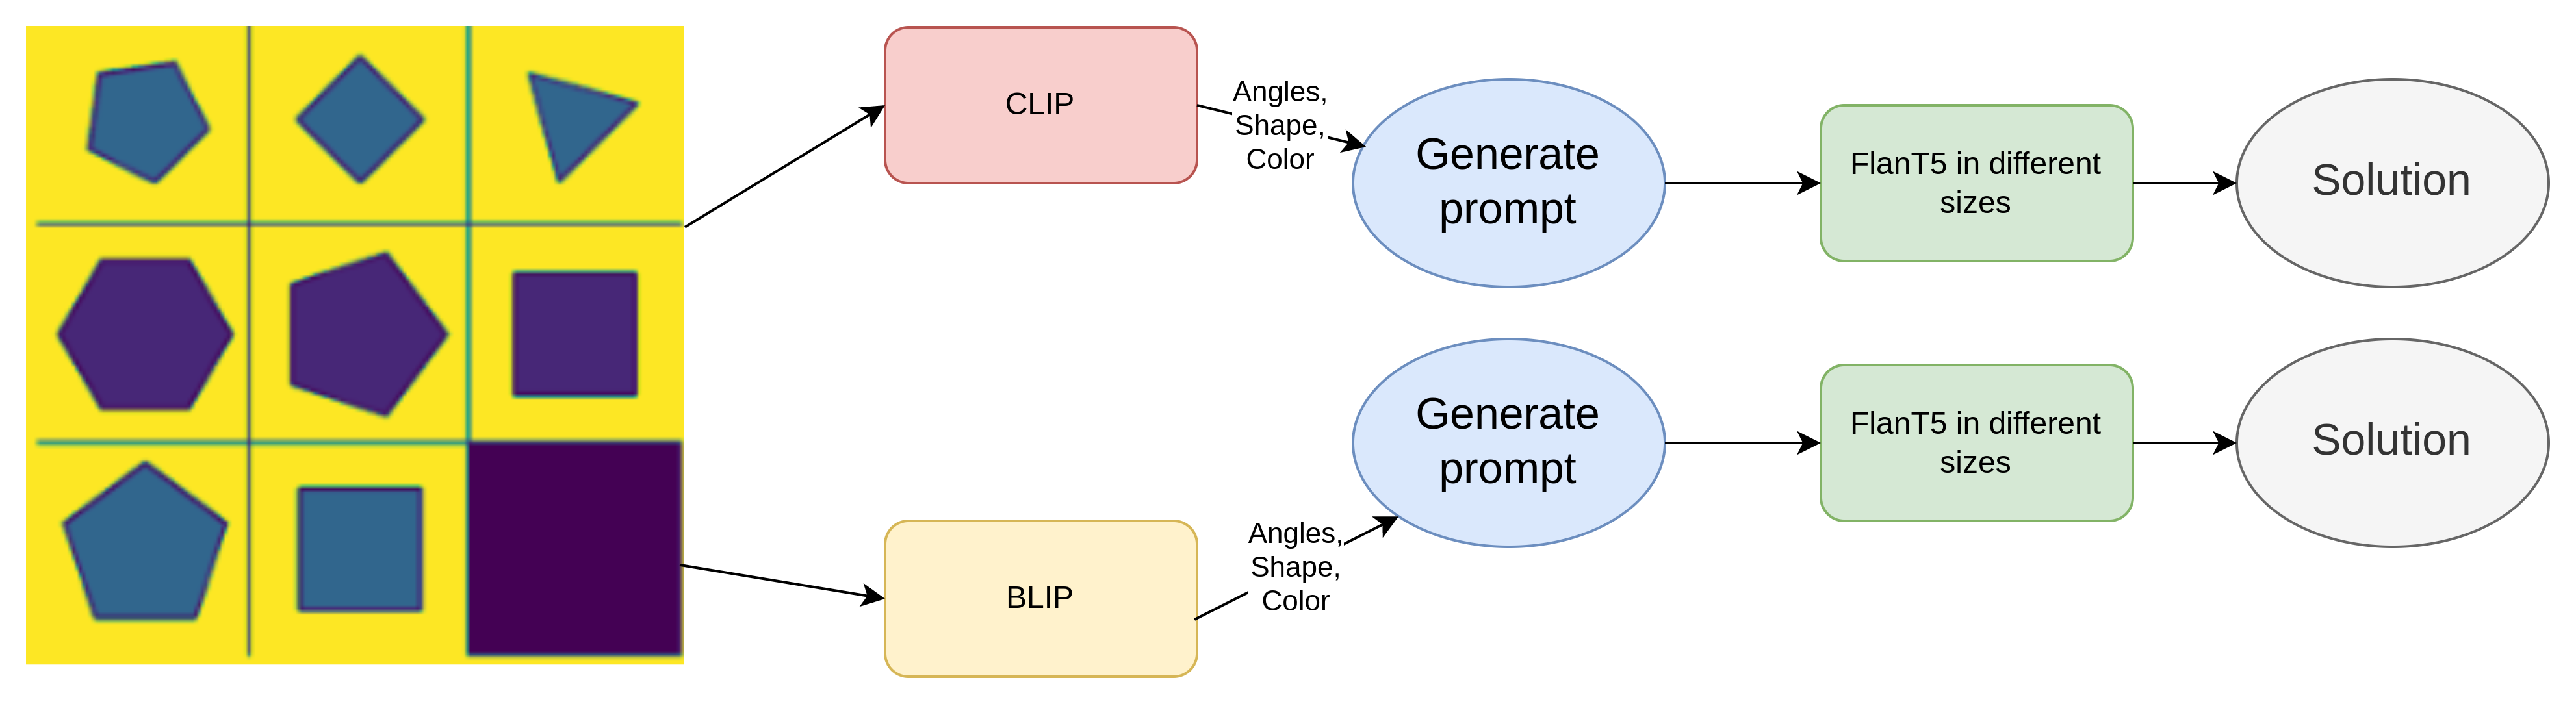

The whole pipeline can be sumarized in this equation:
$$Solution = (f^
2_{LM}(f^1_{VLM}(image)))$$


In [ ]:
from main import Demo
SM = Demo(test_set, None)

First we load the Demo Class. The exact definiton can be seen in our [Github main file](https://github.com/TAkkerboom/DL2_socratic_models_team_2/blob/main/main.py) in the Demo class. A template prompt is defined for the LLM. This prompt is equal defined as follows:

'''You are given a logic puzzle from the RAVEN dataset. The first shape on the first row is {}, the second shape on the first row is {}, the third item on the first row is {}. The first shape on the second row is {}, the second shape on the second row is a {}, the third shape on the second row is {}. The first shape on the third row is {}, the second shape is {}. Based on this, what is the third shape on the third row? You can only choose between: {}, {}, {}, {}, {}, {}, {}, {}'''


The weights of the VLM (CLIP in this case) are loaded

In [ ]:
SM.load_VLM()

loading vlm...


And the weights of the LLM are loaded (FLAN-T5-XXL in torch.float16)

In [ ]:
SM.load_LM()

loading lm...


First the VLM is prompted and then the LM is prompted with the outcome of the VLM. To get the attributes from the image with CLIP, the following method is used:

CLIP is prompted 8 times (for every figure in the puzzle), with 4 different questions. The correct answer, to CLIP, has the lowest Cosine Similarity between the shape and the answer

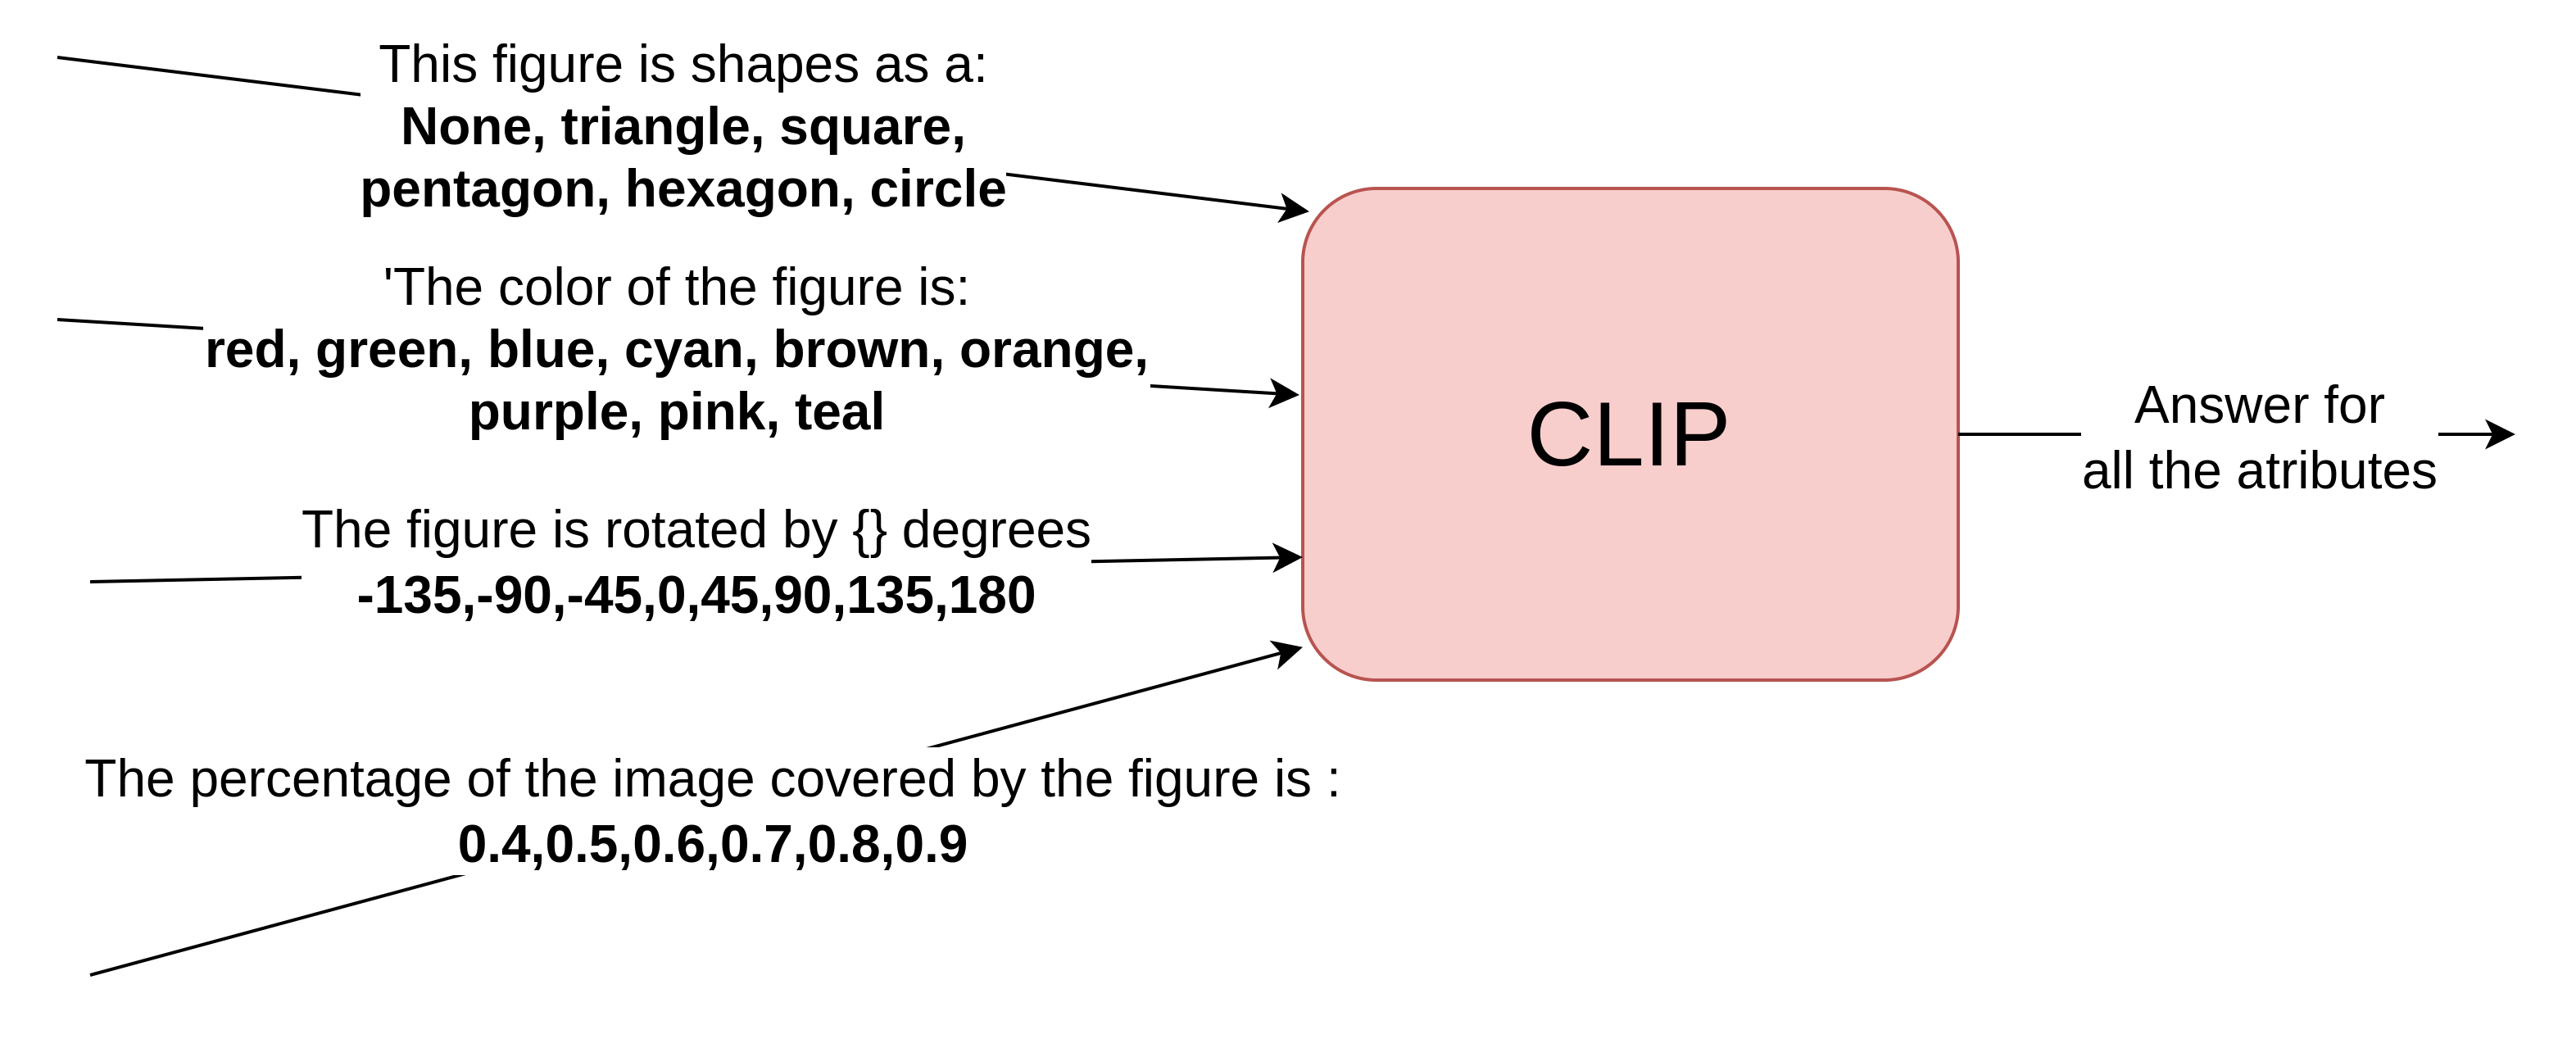



The answers are loaded in the prompt of the LLM to get the answer

In [ ]:
# outputs prediction by the Socratic Model
puzzle = test_set.get_puzzle(PUZZLE_NUMBER)
prediction = SM.forward(puzzle)
print(prediction)

NameError: ignored